# Part 1 -- WordCloud Creation

The libraries that we are going to use:

In [1]:
import pandas as pd
import scipy as sc
import numpy as np
import nltk
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image # more beautiful wordcloud the colored.py's based on the wordcloud's examples
from wordcloud import STOPWORDS, ImageColorGenerator
from sklearn.feature_extraction import stop_words

## Setting up

In [2]:
# read our training-data
mydata = pd.read_csv('train_set.csv', sep='\t')
mydata.head()

,RowNum,Id,Title,Content,Category
0,9560,9561,Sam Adams founder: Beer is more than just 'col...,"The craft beer boom, which and been attributed...",Business
1,10801,10802,Slump in oil prices could mean fall in investm...,The International Energy Agency has warned tha...,Business
2,6726,6727,British Gas owner Centrica warns of higher gas...,Senior executives at British have been accused...,Business
3,12365,12366,Ole Gunnar Solskjaer appointed manager of Card...,is confident he will have complete control of...,Football
4,11782,11783,Sunderland target loan signings of Kurt Zouma ...,Kurt Zouma and Jack Rodwell are on Sunderland’...,Football


We create 5 texts, one for each topic-category, in the form of 5 (very large) strings:

In [3]:
# create texts
text_Business = ""
text_Film = ""
text_Football = ""
text_Politics = ""
text_Technology = ""

for i in range(mydata.shape[0]):
    if (mydata["Category"][i] == "Business"): text_Business += str(mydata["Content"][i])
    elif(mydata["Category"][i] == "Film"): text_Film += str(mydata["Content"][i])
    elif(mydata["Category"][i] == "Football"): text_Football += str(mydata["Content"][i])
    elif(mydata["Category"][i] == "Politics"): text_Politics += str(mydata["Content"][i])
    elif(mydata["Category"][i] == "Technology"): text_Technology += str(mydata["Content"][i])

In [4]:
# our stopwords
stopwords = set(STOPWORDS) | set(stop_words.ENGLISH_STOP_WORDS)
# we add whatever additional words we think we need
stopwords.add('said')
stopwords.add('say')
stopwords.add('says')
stopwords.add('set')

## Creating the WordCloud

The function that we are going to use to create a wordcloud for the argument's *text*, taking into consideration the arguments *stopwords*:

In [5]:
def create_wordcloud(stopwords, text):
    wc = WordCloud(background_color="black", max_words=200, stopwords=stopwords, max_font_size=60, random_state=42, margin=3)
    # generate the wordcloud as specified
    wc.generate(text)
    plt.imshow(wc, cmap=plt.cm.gray, interpolation="bilinear")
    plt.axis("off")
    plt.show()

### Football's WordCloud

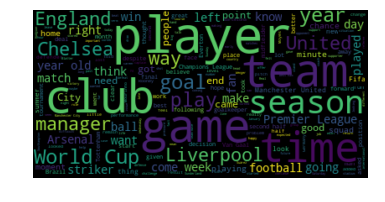

In [6]:
# create the wordcloud for Football based on the data writen above
create_wordcloud(stopwords, text_Football)

### Business' WordCloud

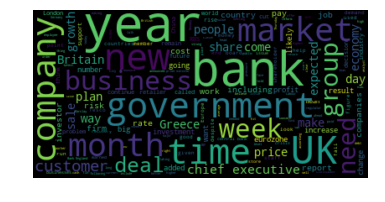

In [7]:
# create the wordcloud for Business based on the data writen above
create_wordcloud(stopwords,text_Business)

### Politics' WordCloud

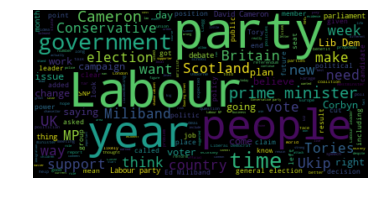

In [8]:
# create the wordcloud for Politics based on the data writen above
create_wordcloud(stopwords, text_Politics)

### Film's WordCloud

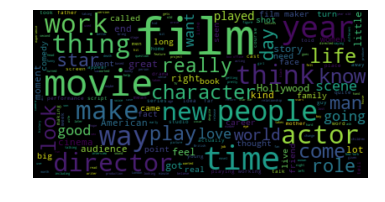

In [9]:
# create the wordcloud for Film based on the data writen above
create_wordcloud(stopwords, text_Film)

### Technology's WordCloud

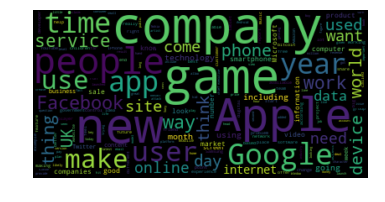

In [10]:
# create the wordcloud for Technology based on the data writen above
create_wordcloud(stopwords,text_Technology)